In [1]:
##white wine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import missingno as msno
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report


In [2]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


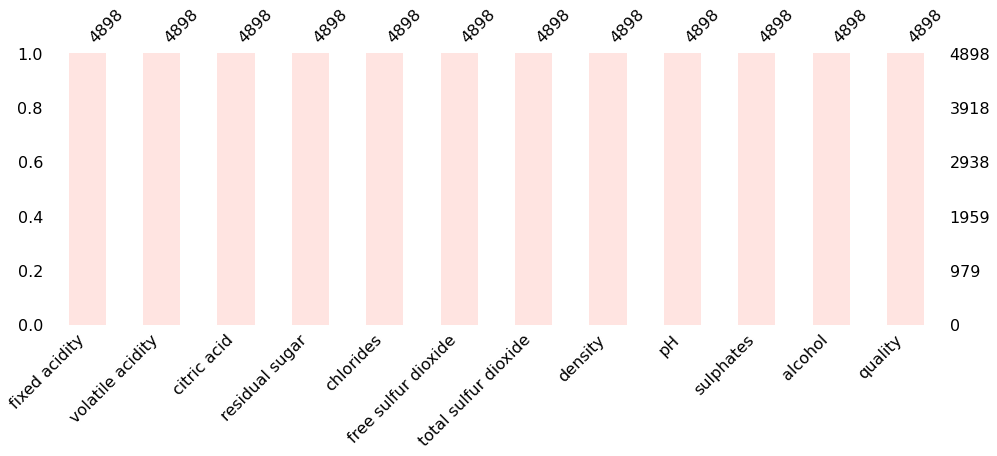

In [6]:
msno.bar(df, figsize = (16,5),color = "#FFE4E1")
plt.show()

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [8]:
df.duplicated().value_counts()

False    3961
True      937
dtype: int64

In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.duplicated().value_counts()

False    3961
dtype: int64

In [11]:
columns=df.columns


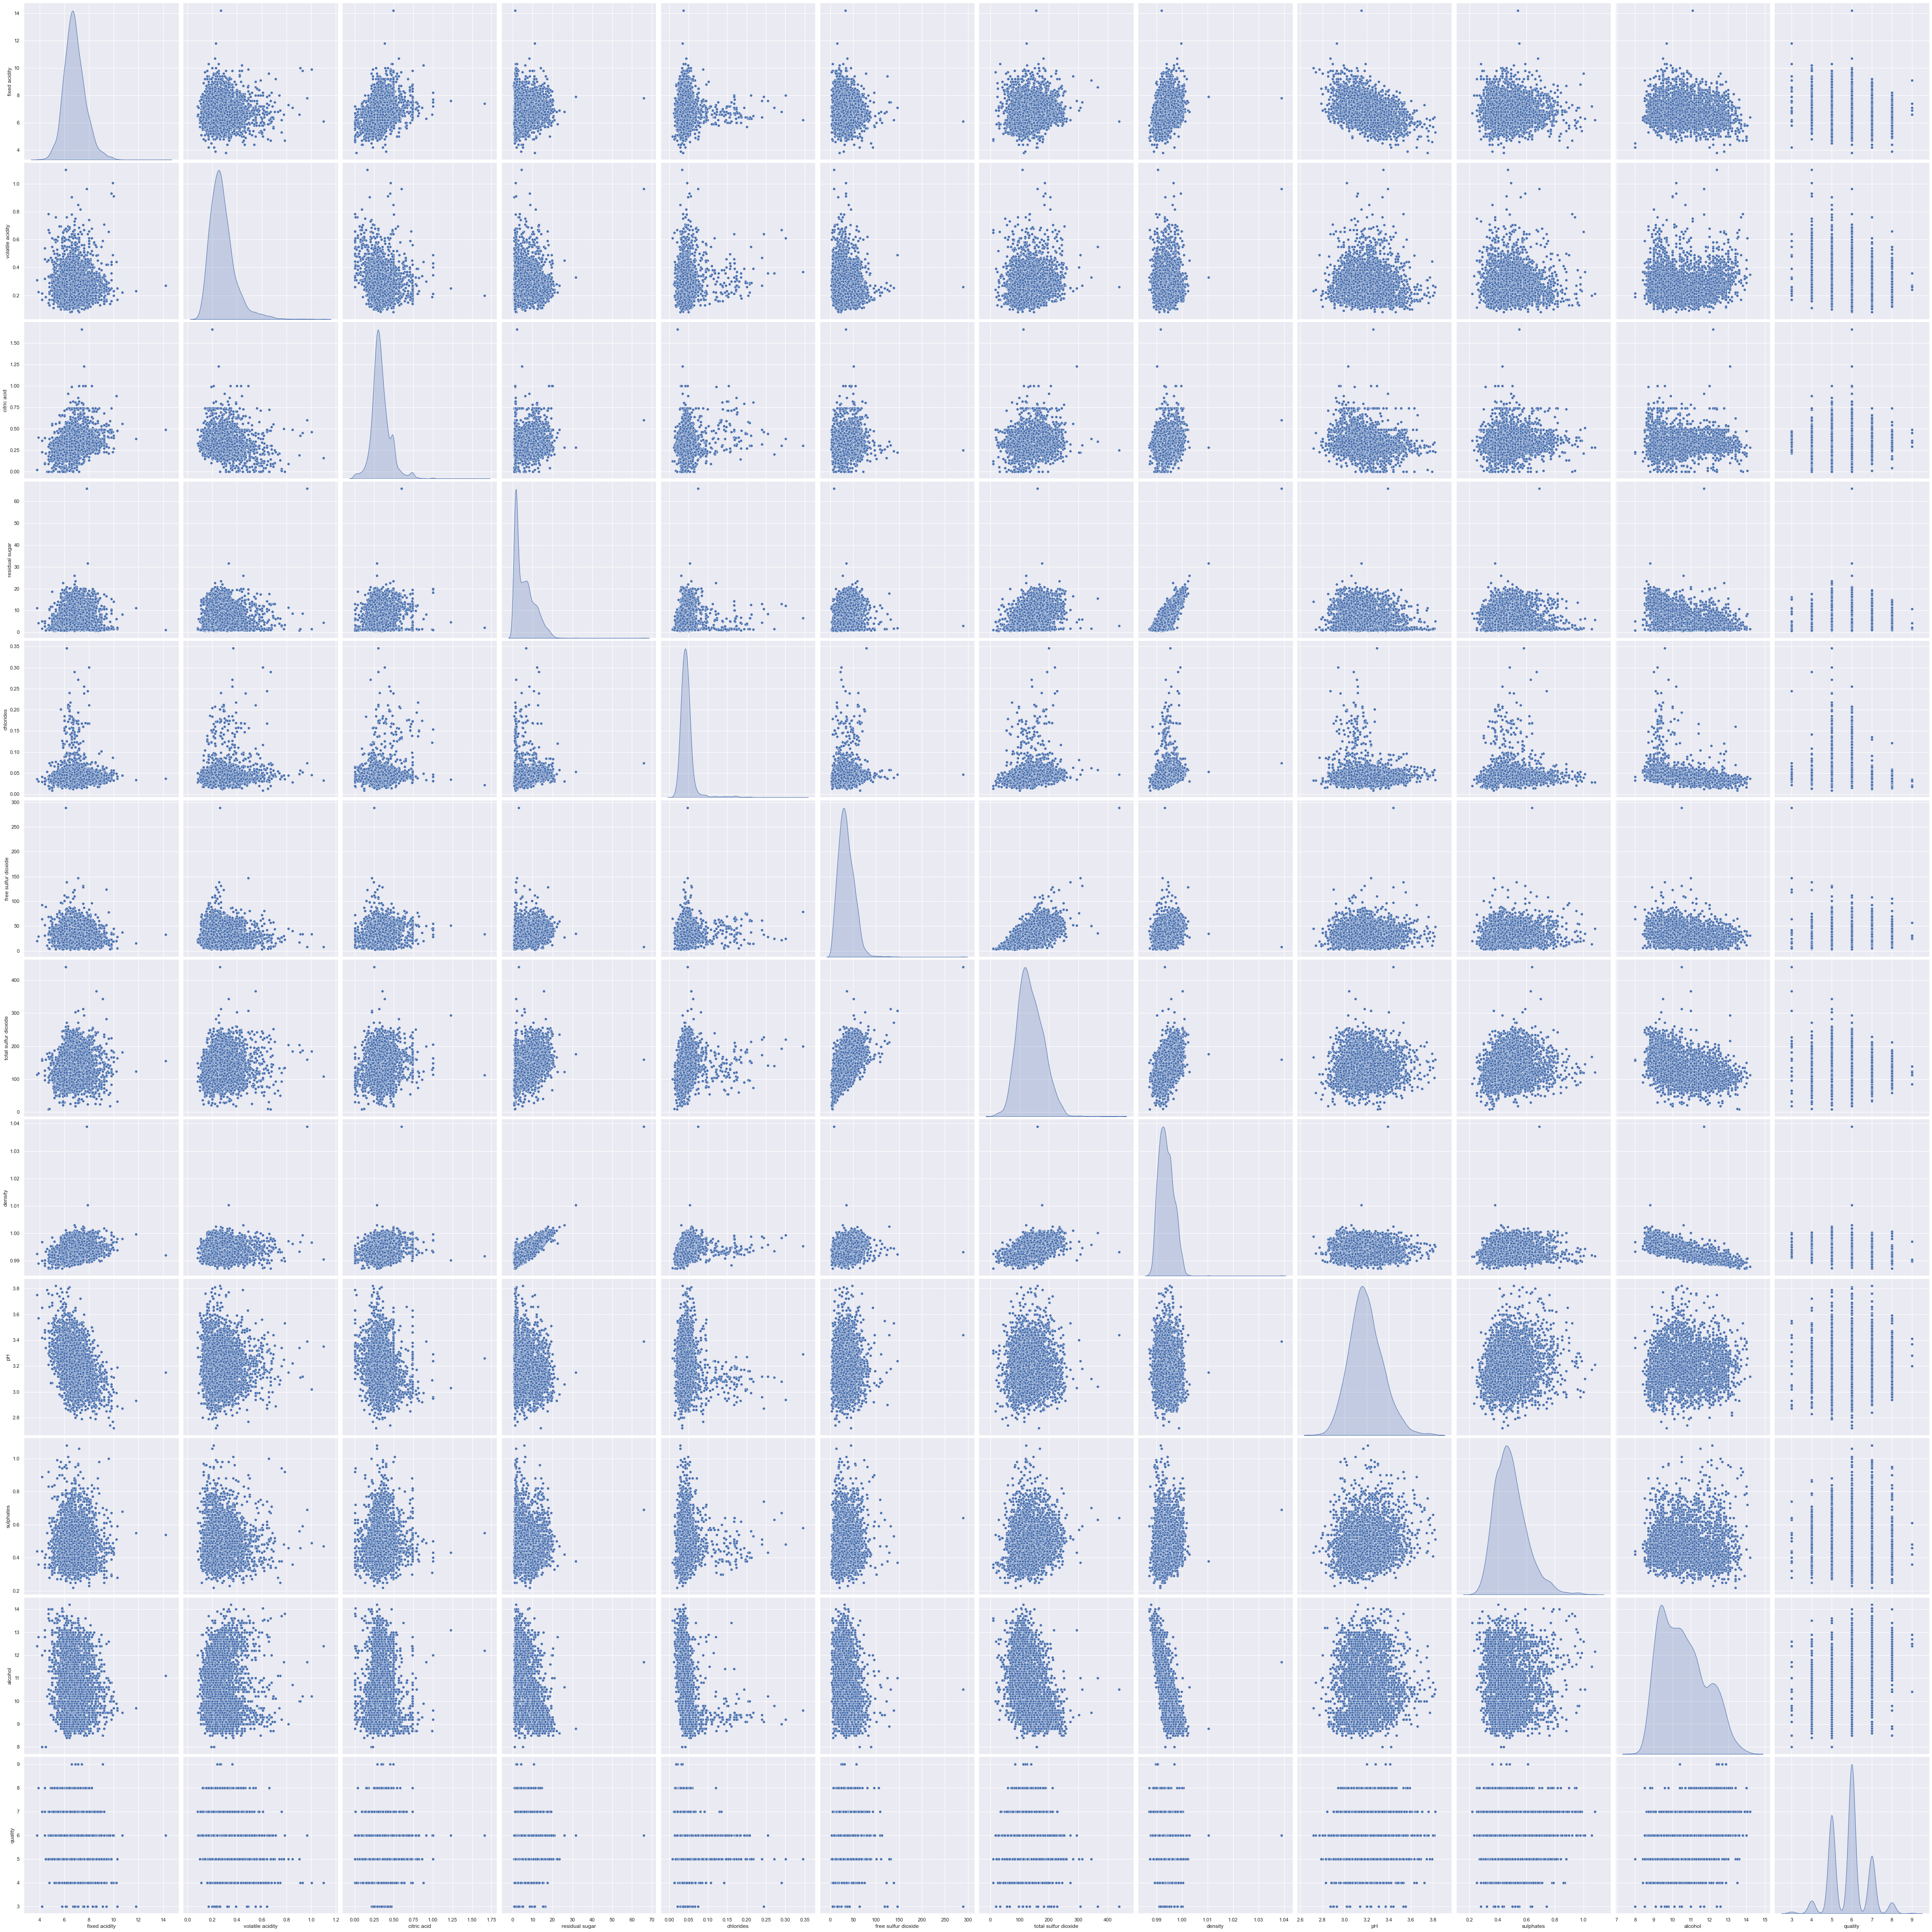

In [12]:
sns.set()
sns.pairplot(df[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [14]:
fig = go.Figure(data=[go.Pie(labels=df['quality'].value_counts().index, values=df['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

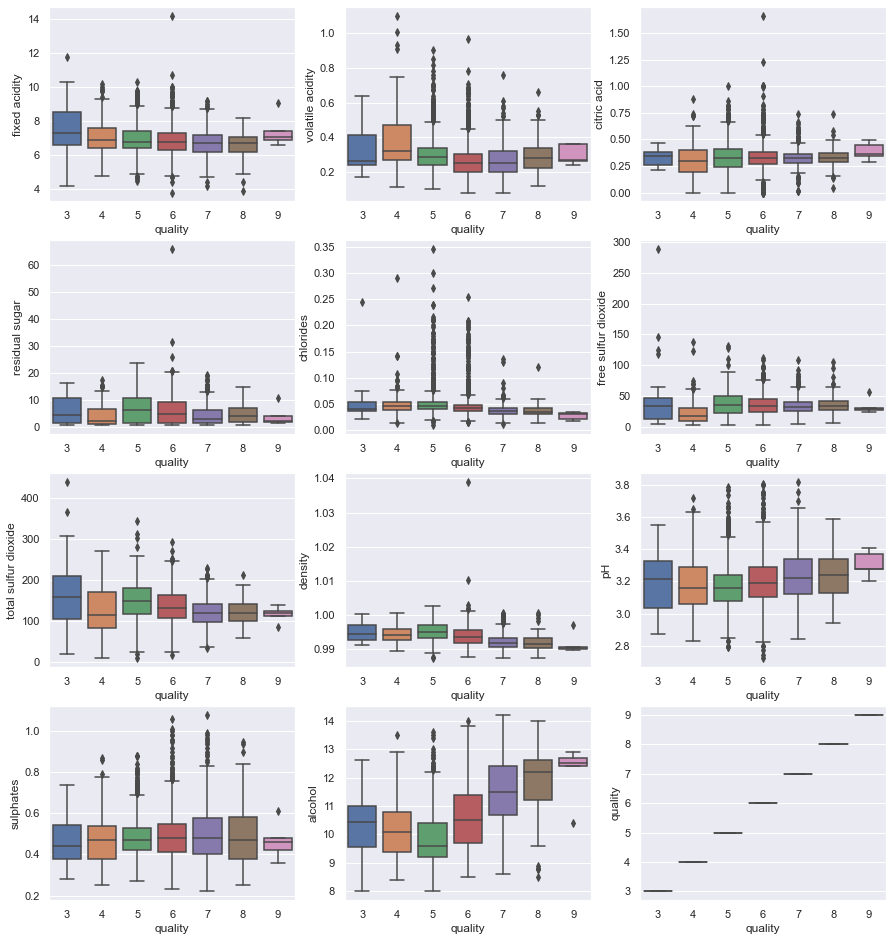

In [15]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x = df['quality'])
    i+=1

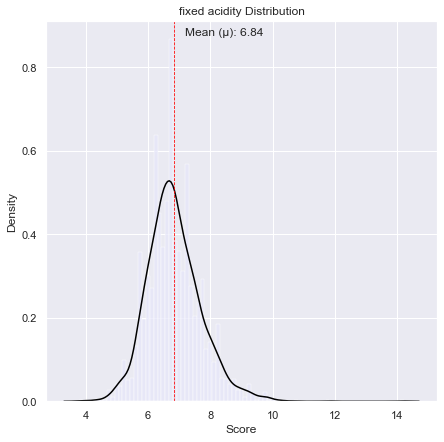

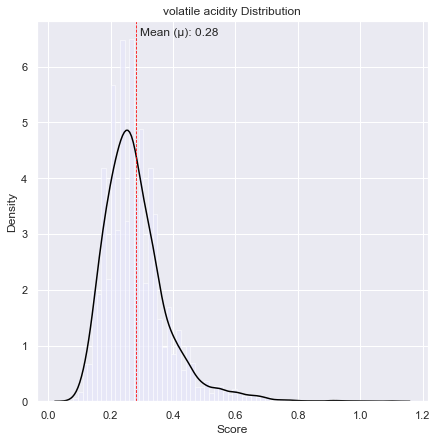

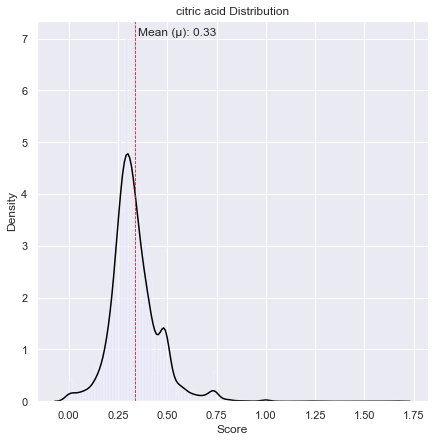

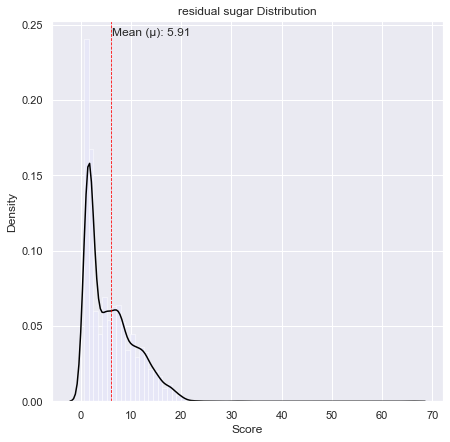

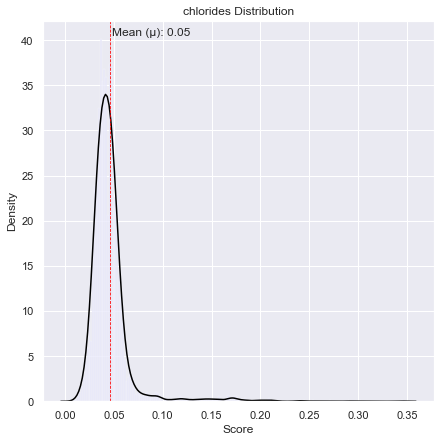

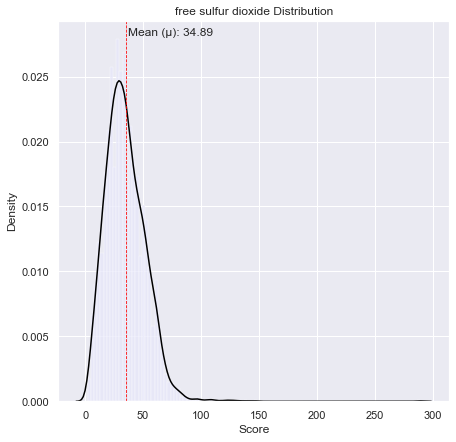

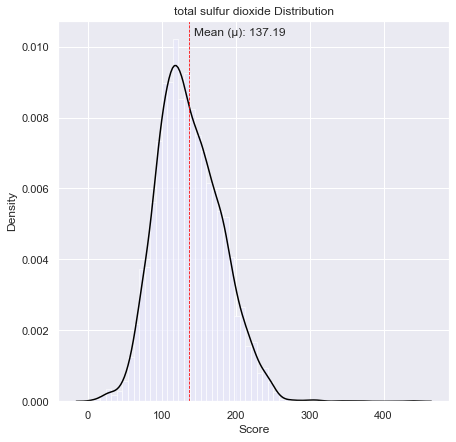

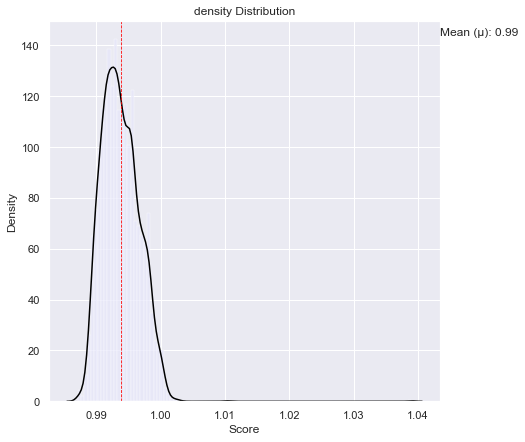

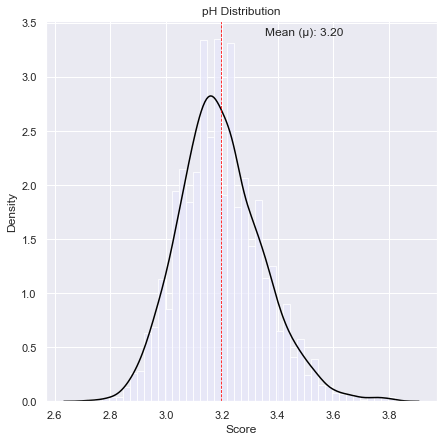

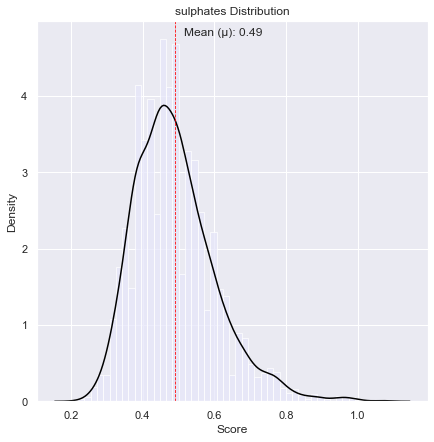

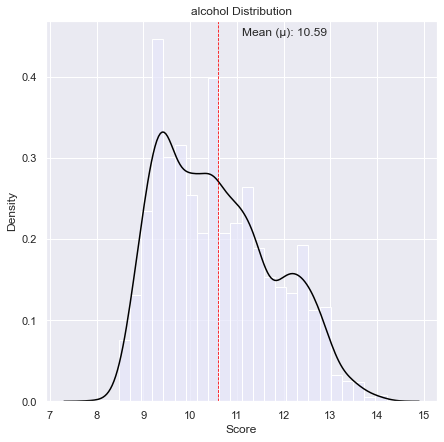

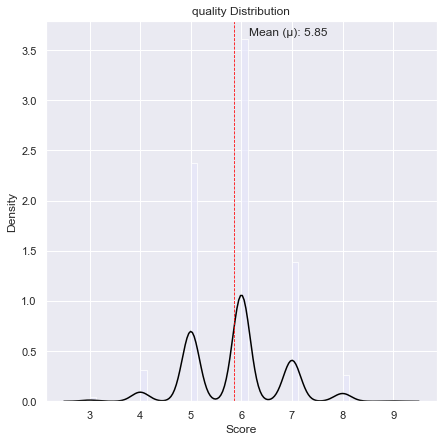

In [16]:
for column_name in df.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density',color='#E6E6FA')
  sns.kdeplot(df[column_name], color='black')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

In [17]:
correlation = df.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'pH', 'sulphates', 'free sulfur dioxide',
       'citric acid', 'residual sugar', 'fixed acidity',
       'total sulfur dioxide', 'volatile acidity'],
      dtype='object')


<AxesSubplot:>

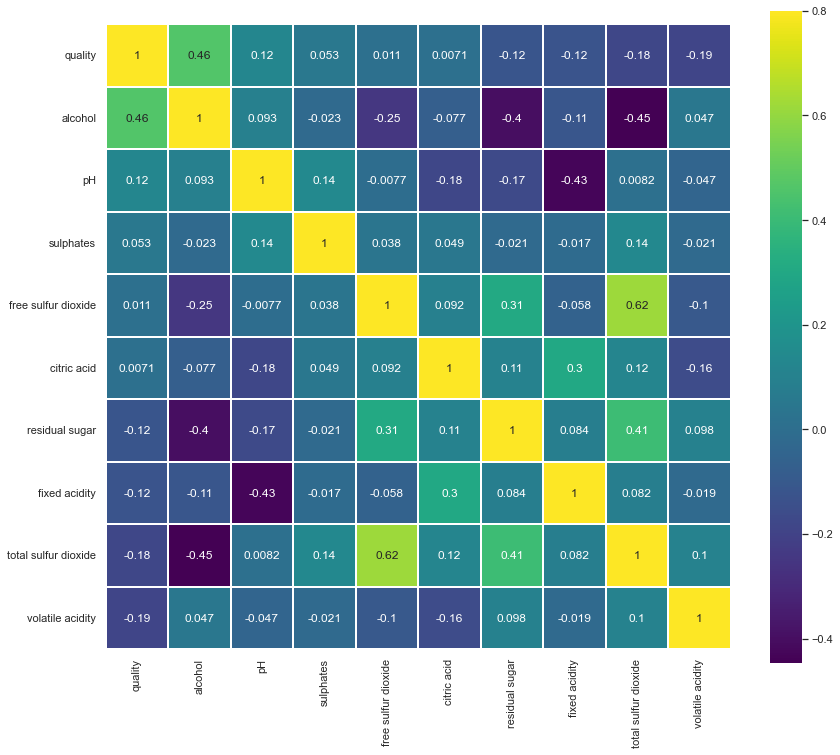

In [18]:
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [19]:
y=df['quality']
df=df.drop(['quality'],axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2772, 11) (1189, 11) (2772,) (1189,)


In [22]:
# Transformar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
X_train_std

array([[ 0.67293361, -0.85988618,  1.26581403, ...,  0.04052109,
        -0.98375962,  0.33238064],
       [-0.39103418,  1.4325102 ,  0.52955719, ...,  0.24026819,
         0.69530745, -1.31222806],
       [ 0.0818404 , -0.85988618,  0.12052561, ..., -1.29112627,
         1.22553916,  0.08568933],
       ...,
       [-0.03637825, -0.85988618, -0.12489334, ...,  0.37343293,
        -1.07213157,  0.41461107],
       [-1.10034603,  0.01805286,  0.0387193 , ...,  0.77292713,
         0.2534477 ,  0.82576325],
       [ 0.55471497,  0.79844312,  0.0387193 , ..., -0.35897312,
         0.69530745, -0.32546284]])

In [24]:
X_test_std

array([[ 0.43649632,  0.40824799,  1.1022014 , ..., -1.09137916,
        -0.71864377,  1.64806759],
       [ 3.39196239, -0.37214227,  0.93858877, ..., -3.02226782,
        -0.18841206,  0.16791977],
       [ 0.43649632, -0.07949592,  3.31097193, ..., -1.0247968 ,
        -0.45352791, -1.55891936],
       ...,
       [ 0.31827768, -0.07949592, -0.53392492, ..., -1.0247968 ,
         0.2534477 ,  0.74353281],
       [-0.50925282, -0.07949592, -1.35198807, ...,  0.10710346,
        -0.18841206, -0.98330632],
       [-1.33678332, -0.27459349, -0.94295649, ...,  0.04052109,
        -0.36515596, -0.40769327]])

In [25]:
model_lin = LinearRegression()

In [26]:
# Treinar o modelo
model_lin.fit(X_train_std, y_train)

LinearRegression()

In [27]:
# Gerando as predições
y_pred = model_lin.predict(X_test_std)

In [28]:
y_pred

array([6.41118862, 5.56517127, 5.36031948, ..., 6.29121171, 5.54313643,
       5.81387622])

In [29]:
# Carregando as metricas
from sklearn.metrics import r2_score

In [30]:
# Calculando o R2
R2 = r2_score(y_test, y_pred)

# Mostra o resultado
print("R2 : ", R2)

R2 :  0.2723275423550918


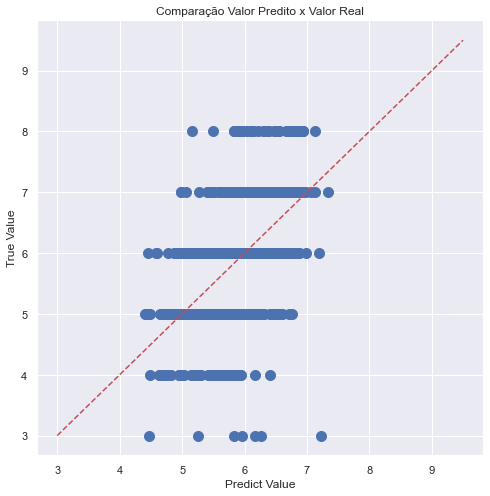

In [31]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_std, y_train)
y_pred_ridge = ridge.predict(X_test_std)

In [33]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_ridge)

# Mostra o resultado
print("R2 : ", R2)

R2 :  0.2722454480688721


In [34]:
from sklearn.linear_model import Lasso
# Instancia o modelo
lasso = Lasso()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
lasso.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [35]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_lasso)

# Mostra o resultado
print("R2 : ", R2)

R2 :  -0.0006195134505069255


In [36]:
lasso.coef_

array([-0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.])

In [37]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()


In [38]:
coef_table.insert(len(coef_table.columns),"Coefs",model_lin.coef_.transpose())
coef_table = coef_table.sort_values(by = ['Coefs'], ascending = False)
coef_table

0     Coefs
10               alcohol  0.318742
3         residual sugar  0.288266
8                     pH  0.100881
5    free sulfur dioxide  0.098775
9              sulphates  0.061784
2            citric acid  0.031912
0          fixed acidity  0.029693
4              chlorides -0.010077
6   total sulfur dioxide -0.031624
1       volatile acidity -0.177711
7                density -0.309417

In [39]:
from sklearn.linear_model import ElasticNet

# Instancia o modelo
EN = ElasticNet()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
EN.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_EN = EN.predict(X_test_std)

In [40]:
# Calculando o R2
R2 = r2_score(y_test, y_pred_EN)

# Mostra o resultado
print("R2 : ", R2)

R2 :  -0.0006195134505069255


In [ ]:
## Regressão Logística red wines

In [41]:
## transformação para a obtenção da target

y_train_class = np.where(y_train >= 6, 1,0)
y_test_class = np.where(y_test >= 6, 1,0)

In [42]:
#verificando se a classe é balanceada, a fim de se verificar 
# o uso correto da acurácia para avaliaçao do modelo.
pd.DataFrame(y_train_class).value_counts(normalize=True)


1    0.662338
0    0.337662
dtype: float64

In [43]:
# import da Regressão Logistica
from sklearn.linear_model import LogisticRegression

In [44]:
# Instancia o classificador
model = LogisticRegression(max_iter = 1000)

In [45]:
# Treinar o modelo
model.fit(X_train_std, y_train_class)

LogisticRegression(max_iter=1000)

In [46]:
y_pred_class = model.predict(X_test_std)
y_pred_class

array([1, 1, 0, ..., 1, 1, 1])

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix


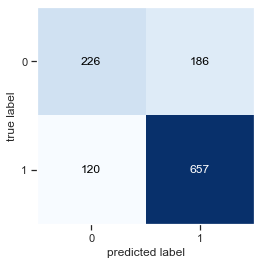

              precision    recall  f1-score   support

           0       0.65      0.55      0.60       412
           1       0.78      0.85      0.81       777

    accuracy                           0.74      1189
   macro avg       0.72      0.70      0.70      1189
weighted avg       0.74      0.74      0.74      1189



In [48]:
cm = confusion_matrix(y_test_class, y_pred_class)
plot_confusion_matrix(cm)
plt.show()

print(classification_report(y_test_class, y_pred_class))

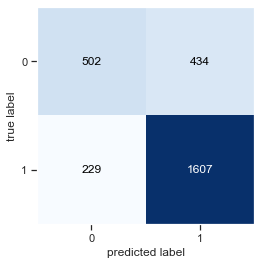

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       936
           1       0.79      0.88      0.83      1836

    accuracy                           0.76      2772
   macro avg       0.74      0.71      0.72      2772
weighted avg       0.75      0.76      0.75      2772



In [49]:
cm = confusion_matrix(y_train_class, model.predict(X_train_std))
plot_confusion_matrix(cm)
plt.show()

print(classification_report(y_train_class, model.predict(X_train_std)))